In [1]:
import mne 
import os 
from utils import *
from scipy.io import loadmat 
import numpy as np
from mne import Epochs, pick_types, events_from_annotations

In [13]:
def fif_read(root,file_name):
    data=loadmat(os.path.join(root,file_name))
    sfreq=data['nfo']['fs'][0][0][0][0]
    eegdata = data['ch1'].T
    nchannels,nsamples = eegdata.shape
    channel_names = [s[0] for s in data['nfo']['clab'][0][0][0]]
    event_onsets = data['mrk'][0][0][0]
    event_codes = data['mrk'][0][0][1]
    labels = np.zeros((1, nsamples),int)
    labels[0, event_onsets] = event_codes
    print("event_onsets = ",len(event_onsets[0]))
    print("event_codes = ",len(event_codes[0]))
    print("labels = ",len(labels[0]))
    print(np.unique(labels))
    cl_lab = [s[0] for s in data['nfo']['className'][0][0][0]]
    cl1 = cl_lab[0]
    cl2 = cl_lab[1]

    nclasses = len(cl_lab)
    nevents=len(event_onsets)

    info = mne.create_info(ch_names = channel_names, sfreq = sfreq, ch_types='eeg')

    raw_data = np.array([data["ch1"],data["ch2"],data["ch3"],data["ch4"],data["ch5"],data["ch6"],
                      data["ch7"],data["ch8"],data["ch9"],data["ch10"],data["ch11"],data["ch12"],
                      data["ch13"],data["ch14"],data["ch15"],data["ch16"],data["ch17"],data["ch18"],
                      data["ch19"],data["ch20"],data["ch21"],data["ch22"],data["ch23"],data["ch24"],
                      data["ch25"],data["ch26"],data["ch27"],data["ch28"],data["ch29"],data["ch30"],
                       data["ch31"],data["ch32"],data["ch33"],data["ch34"],data["ch35"],data["ch36"],
                       data["ch37"],data["ch38"],data["ch39"],data["ch40"],data["ch41"],data["ch42"],
                        data["ch43"],data["ch44"],data["ch45"],data["ch46"],data["ch47"],data["ch48"],
                        data["ch49"],data["ch50"],data["ch51"],data["ch52"],data["ch53"],data["ch54"],
                        data["ch55"],data["ch56"],data["ch57"],data["ch58"],data["ch59"],data["ch60"]])
    
    raw_data = np.reshape(raw_data,(60,len(data['ch1'])))

    raw_data_from_mat = mne.io.RawArray(raw_data, info)

    #raw_data_from_mat.save(os.path.join(fif_dir,file_name).replace("mat","fif"),overwrite=True)

    #raw_path = os.path.join(root,file_name)
    #raw = mne.io.read_raw(raw_path)
    raw = raw_data_from_mat
    # raw.load_data()
    # raw.filter(l_freq=4,h_freq=40)
    return raw, event_onsets, event_codes, labels
    # events, event_id = mne.events_from_annotations(raw)
    # print(events)
    # tmin= 0 
    # tmax = 1
    # baseline = (None, 0)
    # epochs_ica = mne.Epochs(raw,
    #                         events = events,)

In [14]:
files = os.listdir(root)
i=0
# for f in files:
#     fif_read(fif_dir, f)
#     print(i)
#     i=i+1

raw, event_onsets, event_codes, labels = fif_read(root,files[i])

event_onsets =  300
event_codes =  300
labels =  3894800
[ 0  8 11 21 61]
Creating RawArray with float64 data, n_channels=60, n_times=3894800
    Range : 0 ... 3894799 =      0.000 ...  1557.920 secs
Ready.


In [31]:
print(len(raw))

3894800


In [32]:
type(raw)

mne.io.array.array.RawArray

In [33]:
data = raw.load_data()

In [34]:
print(type(data))

<class 'mne.io.array.array.RawArray'>


In [35]:
data

<RawArray | 60 x 3894800 (1557.9 s), ~1.74 GB, data loaded>

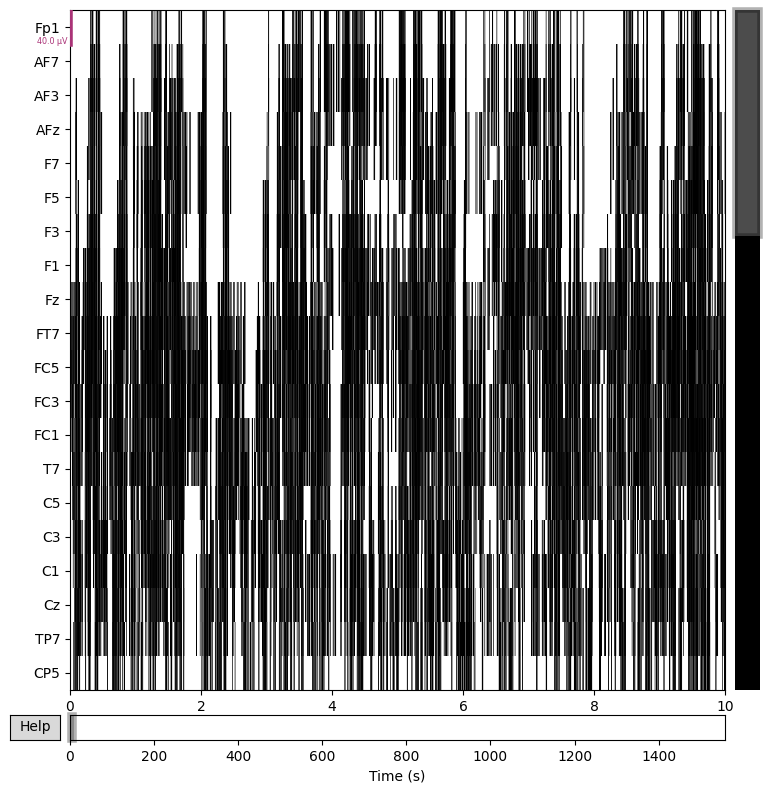

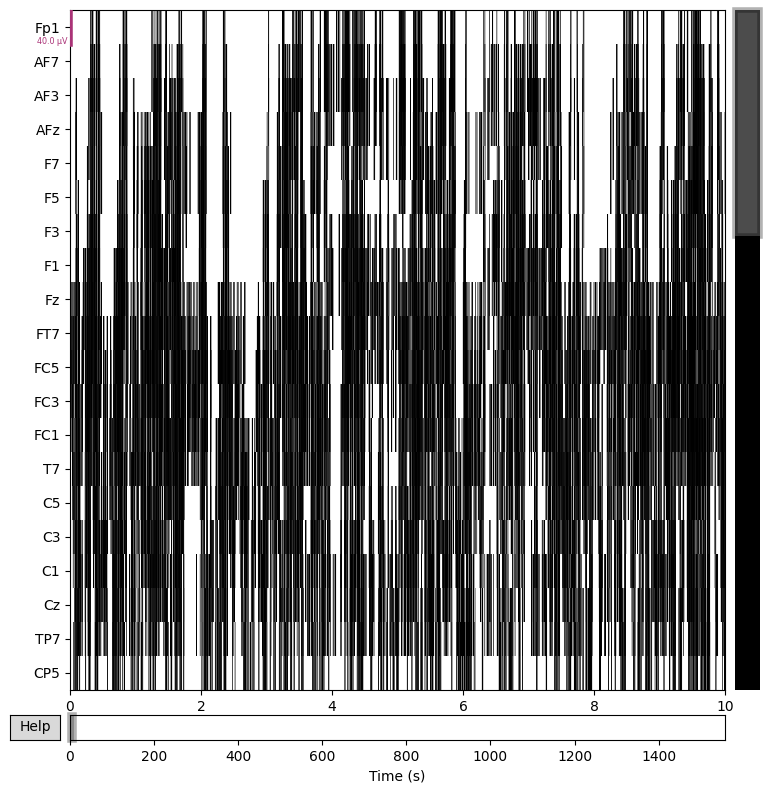

In [36]:
data.plot()

In [15]:
tmin, tmax = -1.0, 4.0
event_id = event_codes[0]

In [18]:
events= event_onsets  #events should be an array of integers shape should be N,3

In [19]:
picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(
    raw,
    events,
    event_id,
    tmin,
    tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)

ValueError: events must be of shape (N, 3), got (1, 300)

In [50]:
raw.copy().pick_types(eeg=True, stim=True).plot(start=0, duration=1)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
